In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Hitplot

<Axes: xlabel='total_bill', ylabel='Count'>

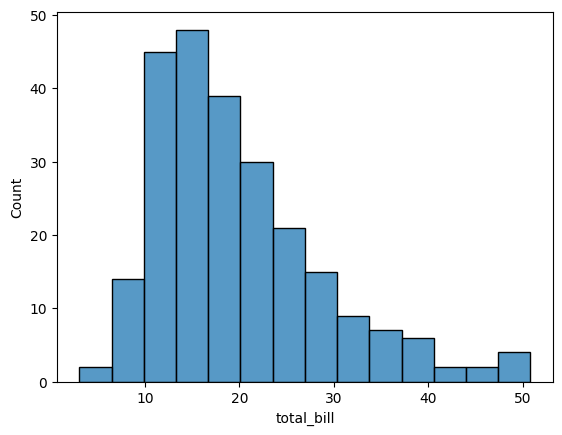

In [ ]:
sns.histplot(data = tip_df["total_bill"]) 

In [ ]:
tip_df["total_bill"].value_counts().sort_values(ascending= False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

KDE Plot

<Axes: xlabel='total_bill', ylabel='Density'>

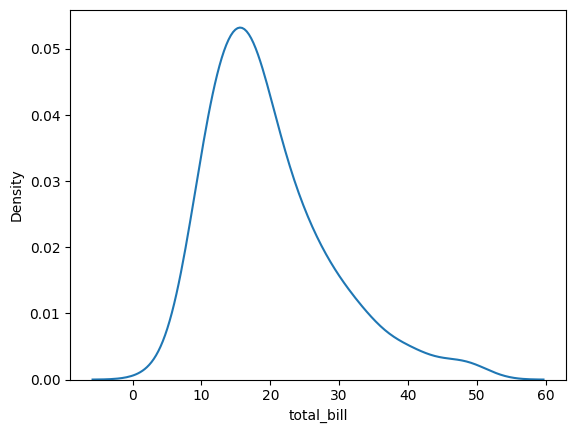

In [ ]:
sns.kdeplot(data = tip_df["total_bill"])

Displot

In [ ]:
sns.set_theme()   # Set theme default

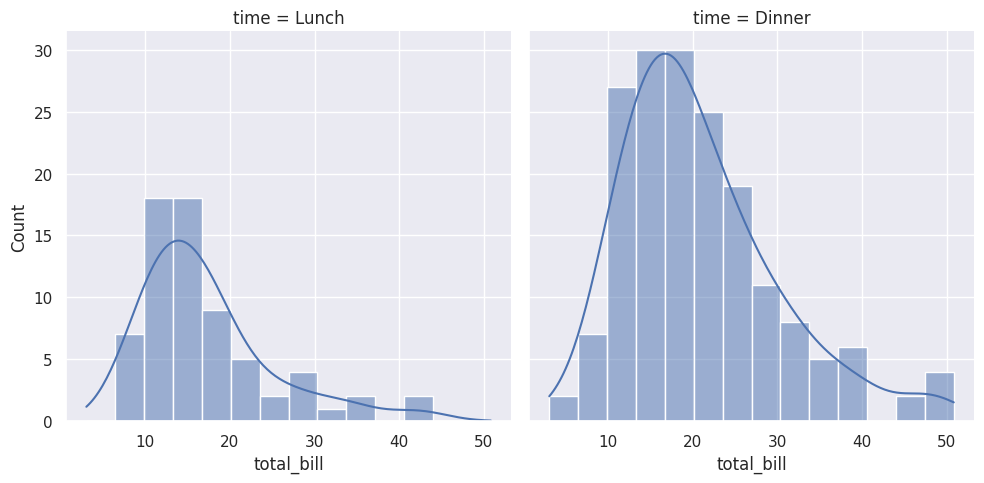

In [ ]:
sns.displot(data=tip_df, x="total_bill", col="time", kde=True);

Bar Plots

In [ ]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='tip'>

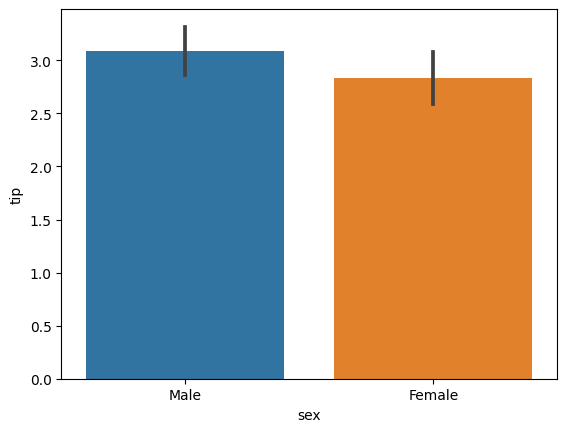

In [ ]:
sns.barplot(data= tip_df , x = 'sex' ,y= 'tip' )

In [ ]:
tip_df['sex'].value_counts() #Đếm giá trị

Male      157
Female     87
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

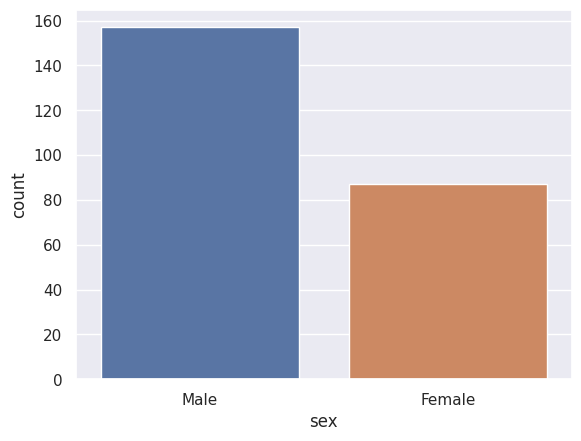

In [ ]:
sns.countplot(data =tip_df , x='sex') #Hàm countplot sẽ ra biểu đồ có cột chỉ số

Box plot

In [ ]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


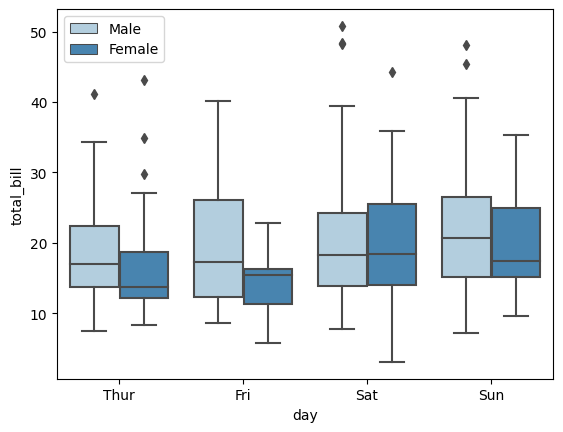

In [ ]:
sns.boxplot(data=tip_df, x="day", y="total_bill", hue="sex", palette='Blues');
plt.legend(loc=0);

Scatterrplot

<Axes: xlabel='total_bill', ylabel='tip'>

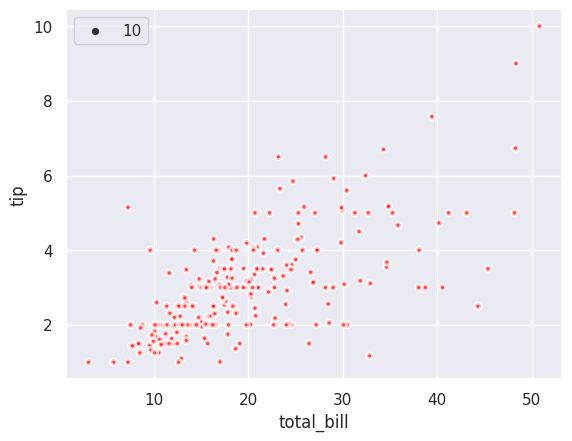

In [ ]:
sns.scatterplot(data=tip_df, x="total_bill", y="tip",
                color="red", alpha=0.7, size=10,
                linewidth=2, marker="o")

Facet Grid

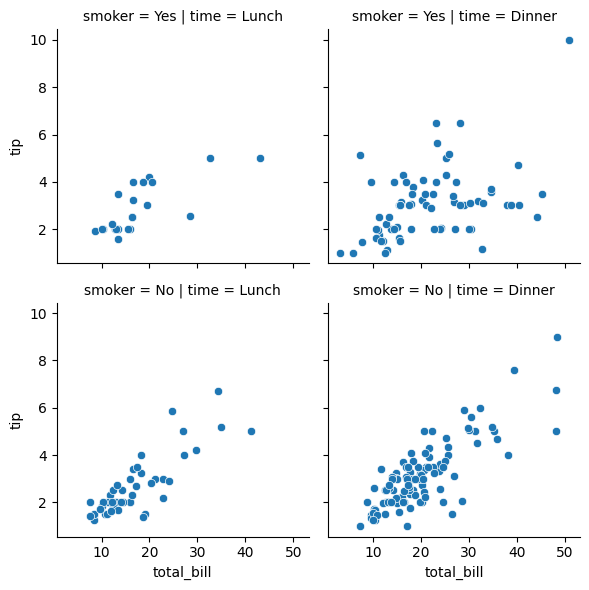

In [ ]:
tips_fg = sns.FacetGrid(data=tip_df, row="smoker", col="time")
tips_fg.map(sns.scatterplot,  'total_bill', 'tip');

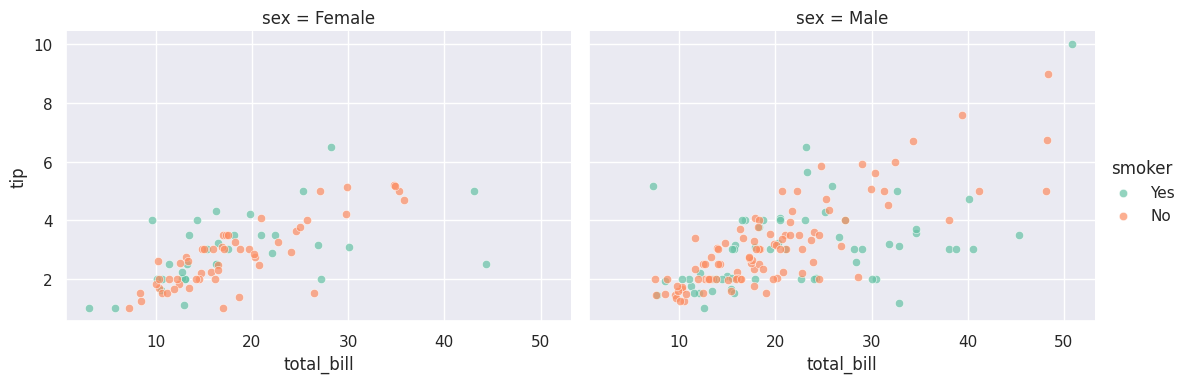

In [ ]:
tips_fg = sns.FacetGrid(data=tip_df  , col= "sex" ,
                                       hue = "smoker", #Phủ màu cho những người hút thuốc
                                       col_order = ['Female','Male'],  #Thay đổi vị trí nam nữ
                                       palette = "Set2", # Đổi màu
                                       height = 4 , aspect =1.4) # Chiều cao chiều rộng



tips_fg.map(sns.scatterplot , 'total_bill' ,'tip',alpha=.7); # để vẽ chấm "scatterplot"
                                                             # 'alpha' là để làm mờ các chấm tròn


tips_fg.add_legend(); #Thêm chú thích "màu xanh" , "màu cam"



In [ ]:
pg_df = sns.load_dataset('penguins')
pg_df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


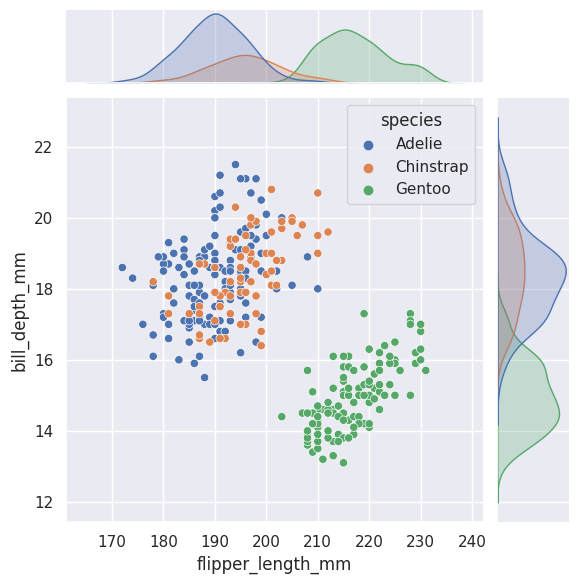

In [ ]:
sns.jointplot(data=pg_df , x= 'flipper_length_mm' , y= "bill_depth_mm" ,hue = "species") #"hue" phủ màu cho từng loài khác nhau

Heatmaps

In [ ]:
flight_df = sns.load_dataset("flights")
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights = pd.pivot_table(flight_df , index = "month" , columns= "year" , values="passengers") #Index là như mục lục
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

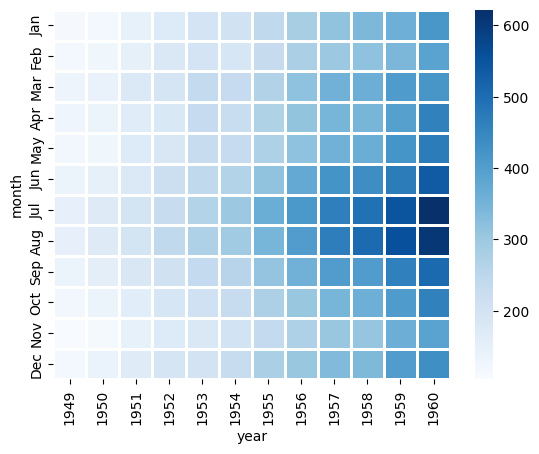

In [ ]:
sns.heatmap(data=flights , cmap="Blues" ,linecolor= "white" ,linewidths= "1")

Dự án: Trực quan hóa dữ liệu dinh dưỡng trên 80 sản phẩm ngũ cốc

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cereal_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodeExplore/cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df_new = cereal_df.drop(fields , axis =1 )
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [5]:
cereal_corr = cereal_df_new.corr()
cereal_corr

<ipython-input-5-8c6344d1fcf4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cereal_corr = cereal_df_new.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [6]:
one_corr = np.ones_like(cereal_corr, dtype = bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [7]:
one_corr.shape , cereal_corr.shape

((9, 9), (9, 9))

In [8]:
mask = np.triu(one_corr) #Tạo ra 2 miền giá trị để dễ vẽ biểu đồ
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

<Axes: >

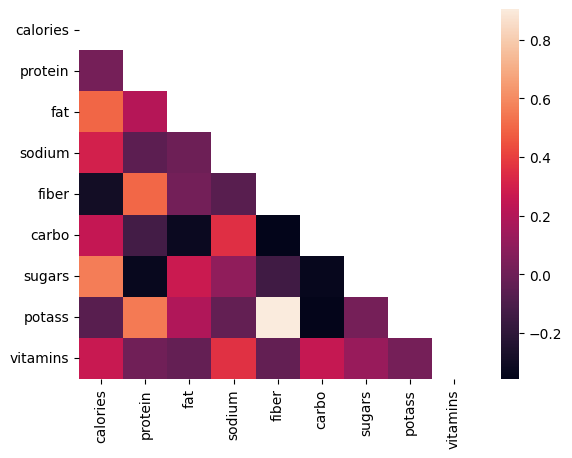

In [9]:
sns.heatmap(data = cereal_corr , mask = mask)

In [10]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [10]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

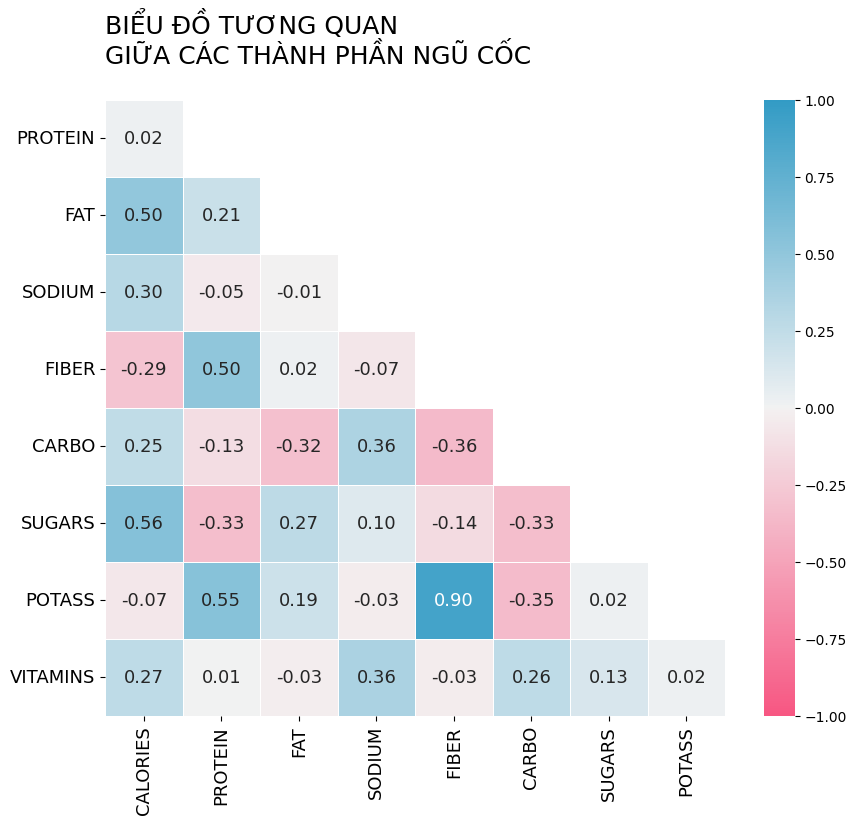

In [11]:
 # Tạo một figure và một axes với kích thước 10x8
fig, ax = plt.subplots(figsize=(10,8))

# Tạo một palette màu tùy thích
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# data: Ma trận tương quan đã điều chỉnh
# mask: Ma trận mask để ẩn các giá trị tương quan bằng 1
# annot: Hiển thị chú thích trên biểu đồ
# annot_kws: Các tham số cho chú thích
# fmt: Định dạng của chú thích
# cmap: Palette màu
# vmin: Giá trị nhỏ nhất của dữ liệu
# vmax: Giá trị lớn nhất của dữ liệu
# linecolor: Màu của đường lưới
# linewidths: Độ rộng của đường lưới
sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

# Tạo các nhãn cho trục y và trục x
yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

# Thiết lập các nhãn cho trục y và trục x
ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

# Tạo tiêu đề cho biểu đồ
title = 'BIỂU ĐỒ TƯƠNG QUAN\nGIỮA CÁC THÀNH PHẦN NGŨ CỐC\n'
ax.set_title(title, loc='left', fontsize=18);